# 1) Load The Tweets Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project_datasets/tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
# 0 refers to positive sentiment, 1 is negative sentiment

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [ ]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
# drop the id column
data.drop(['id'], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<Axes: >

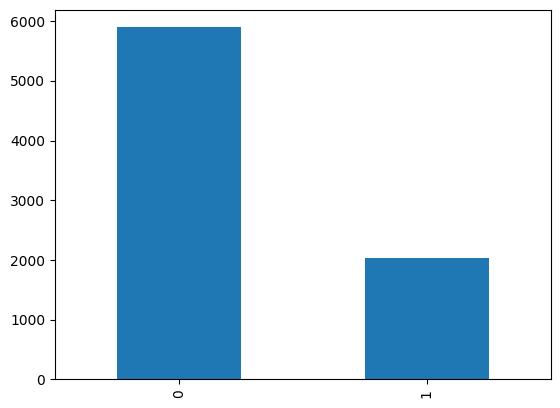

In [ ]:
# plot the label counts
data['label'].value_counts().plot(kind='bar')

# 2) Data Cleaning

In [ ]:
import re

In [ ]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{"should've", 'just', 'then', 'such', "shan't", 'here', 'hadn', 'own', 'to', 'is', 'hers', 'into', "aren't", 'won', 'why', 'ourselves', 'him', 'after', 'in', 'any', "couldn't", 'isn', 'too', 'with', "isn't", 'our', 'few', 'was', 'off', 'who', 'mustn', 'weren', "doesn't", 'my', 'o', 'until', 'it', 'be', 'when', 'if', 'didn', 'these', 'same', 'while', 'where', 'myself', 'more', 'because', "you'll", 'but', 'there', 'has', 'her', 'other', 'shan', 'you', "haven't", "it's", 'them', 'by', 'will', 't', 'for', 'does', 'now', 'of', 'mightn', 'me', 'which', "weren't", 'had', 'most', 'll', 'aren', 'itself', 'are', 'before', 'again', 'your', "needn't", 'those', "you're", 'an', 'herself', 'yours', 'their', 'at', "you'd", 'a', 'as', 'were', 'very', 'himself', "mustn't", "wouldn't", "shouldn't", 'what', 'not', 'nor', 'he', 'haven', 'couldn', "mightn't", 'themselves', 'and', 'yourself', 'between', 'from', 'we', 'shouldn', 'up', 'doesn', 'each', "won't", 's', 'can', 'theirs', 'below', 'd', "you've", 'be

In [ ]:
len(nltk_stopwords)

179

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'anyhow', 'wherein', 'several', 'thin', 'seem', 'thru', 'amongst', 'whether', 'whose', 'whoever', 'own', 'besides', 'sometime', 'thence', 'could', 'ourselves', 'interest', 'any', 'twelve', 'first', 'too', 'with', 'our', 'get', 'together', 'otherwise', 'thus', 'de', 'ever', 'often', 'it', 'must', 'if', 'these', 'while', 'there', 'even', 'her', 'noone', 'them', 'less', 'herein', 'mine', 'whenever', 'now', 'for', 'five', 'everywhere', 'which', 'had', 'formerly', 'upon', 'are', 'before', 'hundred', 'around', 'although', 'your', 'those', 'bill', 'beyond', 'nobody', 'at', 'hereby', 'inc', 'as', 'very', 'since', 'three', 'what', 'not', 'nine', 'empty', 'side', 'themselves', 'us', 'from', 'we', 'well', 'each', 'below', 'former', 'see', 'mostly', 'top', 'yourselves', 'couldnt', 'put', 'whence', 'found', 'fifty', 'hereupon', 'anywhere', 'hasnt', 'twenty', 'once', 'forty', 'about', 'under', 'out', 'many', 'ours', 'elsewhere', 'across', 'through', 'go', 'nowhere', 'anything', 'however', 'whereaft

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'then', 'such', 'here', 'own', 'to', 'is', 'hers', 'into', 'why', 'ourselves', 'him', 'after', 'in', 'any', 'too', 'with', 'our', 'few', 'was', 'off', 'who', 'my', 'until', 'it', 'be', 'when', 'if', 'these', 'same', 'while', 'where', 'myself', 'more', 'because', 'but', 'there', 'has', 'her', 'other', 'you', 'them', 'by', 'will', 'for', 'now', 'of', 'me', 'which', 'had', 'most', 'itself', 'are', 'before', 'again', 'your', 'those', 'an', 'herself', 'yours', 'their', 'at', 'a', 'as', 'were', 'very', 'himself', 'what', 'not', 'nor', 'he', 'themselves', 'and', 'yourself', 'between', 'from', 'we', 'up', 'each', 'can', 'below', 'been', 'on', 'yourselves', 'have', 'she', 'how', 'during', 'its', 'his', 'once', 'about', 'being', 'under', 'out', 'ours', 'through', 'only', 'do', 'further', 'i', 'that', 'should', 'against', 'or', 'they', 'whom', 'am', 'than', 'both', 'over', 're', 'no', 'all', 'some', 'the', 'this', 'down', 'so', 'above'}


In [ ]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [ ]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [ ]:
len(combined_stopwords)

378

In [ ]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
import contractions

Define the Cleaner Function without stopword

In [ ]:
def tweet_cleaner_without_stopwords(text):
    # Substitute 's with " is"
    new_text = re.sub(r"'s\b", " is", text)
    # removing the hashtags
    new_text = re.sub("#", "", new_text)
    # We'll retain on the alphabets & digits
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    # Removing the hyperlinks
    new_text = re.sub(r"http\S+", "", new_text)
    # getting rid of contractions
    new_text = contractions.fix(new_text)
    # Retain on the alphabets (get rid of punctuations, special char, digits)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    # convert into the lowercase
    new_text = new_text.lower().strip()
    #performing lemmatization
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [ ]:
cleaned_tweets[:5]

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [ ]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [ ]:
data['tweet'][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [ ]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [ ]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


# 3) Data Visualization

Plot the top 25 most common words in this tweets dataset

In [ ]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

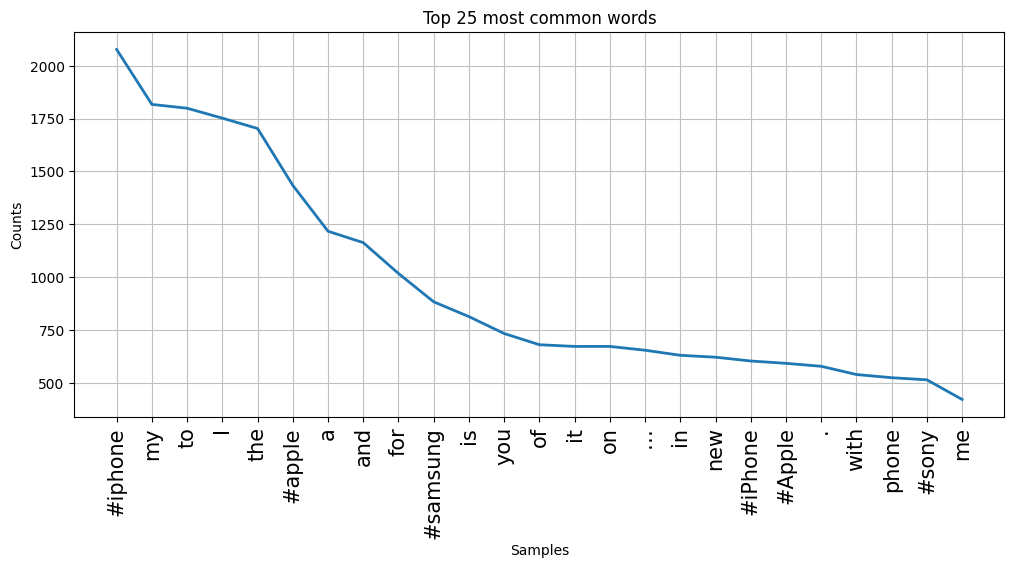

In [ ]:
import matplotlib.pyplot as plt
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

Plot for Cleaned Tweets without stopwords

In [ ]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


In [ ]:
len(set(all_words)) # this is the number of unique words in the list

15981

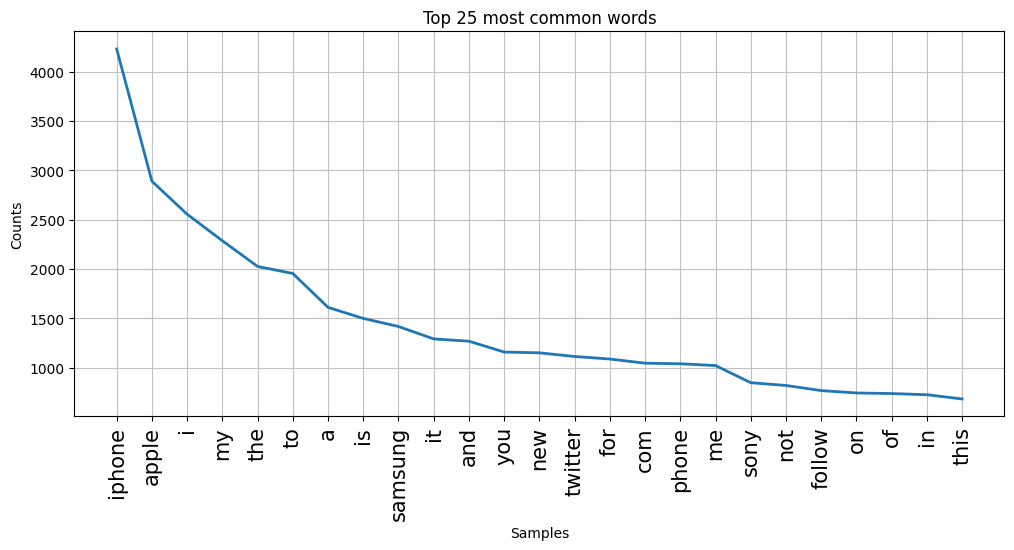

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

Plot for Cleaned Tweets with stopwords

In [ ]:
type(combined_stopwords)

set

In [ ]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [ ]:
data.columns

Index(['label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [ ]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


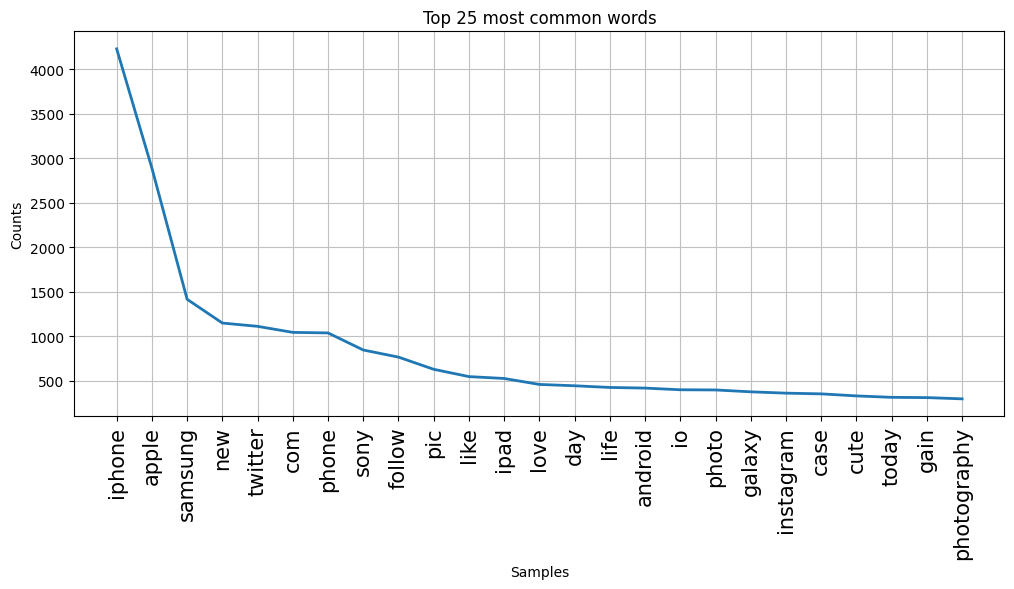

In [ ]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

Plot for Cleaned Tweets after applying Domain specific stopwords

In [ ]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [ ]:
def tweet_cleaner_with_Fstopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in final_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_Fstopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [ ]:
data['cleaned_tweets_with_FinalSW'] = cleaned_tweets
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW,cleaned_tweets_with_FinalSW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


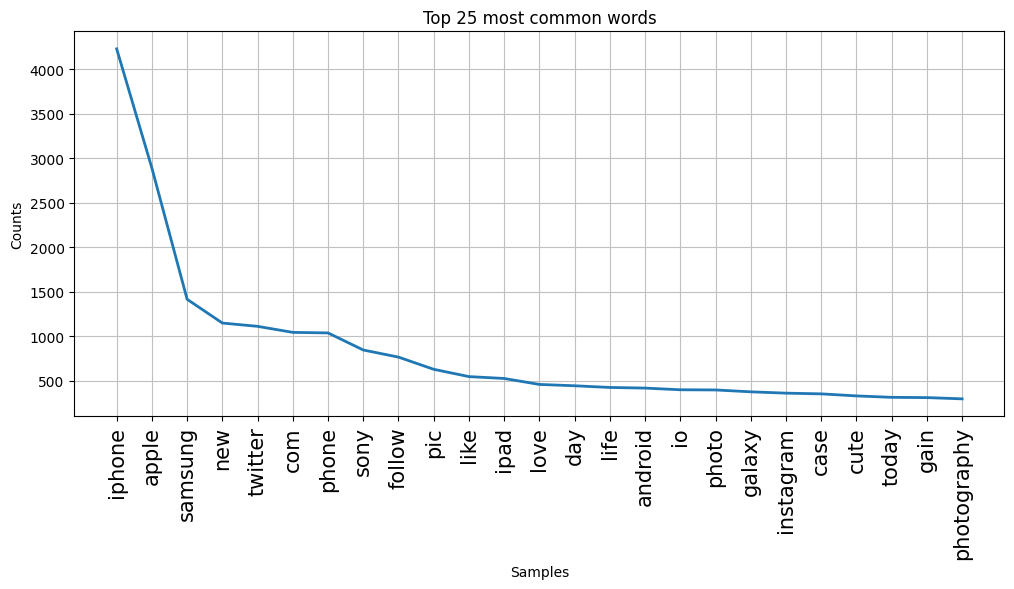

In [ ]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


# 4) Bag of Words Model (Feature Extraction)

- Countvectorizer
- TF-IDF Vectorizer

In [ ]:
data.shape

(7920, 4)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [ ]:
CV_features.shape

(7920, 15955)

In [ ]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
df = data.copy()
df.columns = ['label', 'cleaned_tweets_incl_SW', 'cleaned_tweets_SW_removed', 'cleaned_tweets_SW_removed_len_gt2']
df.to_pickle('cleaned_tweets.pkl')
df.to_csv('cleaned_tweets', index=False)

In [ ]:
type(CV_features[0])  # each row is a compressed spare row

scipy.sparse._csr.csr_matrix

In [ ]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.size/1e6  # these many elements/numbers are presnt in the df

126.3636

In [ ]:
import numpy as np
np.count_nonzero(df)

114973

In [ ]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements in the df

0.09098585352110893

In [ ]:
print(CV.get_feature_names_out()[:50])  # these the vocab words

['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abe' 'aber' 'abercrombie' 'abi'
 'ability' 'abit' 'able' 'ableton' 'abnqum' 'aboard' 'about' 'aboutalook'
 'aboutdamntime' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones']


In [ ]:
len(CV.get_feature_names_out())

15955

In [ ]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

# 5) Model building

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)

0.9779461279461279
0.8813131313131313


In [ ]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)

0.9038720538720538
0.8813131313131313


In [ ]:
# Cross-Validate the Logistic Regression Model
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [ ]:
X = CV_features
y = data['label']

In [ ]:
# CROSS VALIDATE THE LR1 model
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


In [ ]:
# accuracy = 88.23 +/- 0.93 %

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [ ]:
results

{'fit_time': array([0.04512143, 0.04282331, 0.04276967, 0.04370499, 0.04244757]),
 'score_time': array([0.00141835, 0.00115252, 0.00134206, 0.00116277, 0.00133204]),
 'test_score': array([0.88320707, 0.86931818, 0.87752525, 0.89709596, 0.88699495]),
 'train_score': array([0.90388258, 0.90909091, 0.9040404 , 0.90372475, 0.90451389])}

In [ ]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

[0.90388258 0.90909091 0.9040404  0.90372475 0.90451389]
90.51 0.2


In [ ]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


Hyper parameter tuning of the LR1 model

In [ ]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [ ]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8906565656565656, 19)

In [ ]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [ ]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.06565656565655

In [ ]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100
# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!

93.28598484848484

In [ ]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6480114858765835

In [ ]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88156566, 0.88295455, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88876263, 0.88939394,
       0.88888889, 0.88939394, 0.8895202 , 0.88989899, 0.89065657])

In [ ]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.85      , 0.86998106, 0.8803346 , 0.88712121,
       0.89236111, 0.89649621, 0.90094697, 0.90505051, 0.90811237,
       0.91003788, 0.91344697, 0.91568813, 0.91859217, 0.92136995,
       0.92335859, 0.92607323, 0.92856692, 0.93052399, 0.93285985])

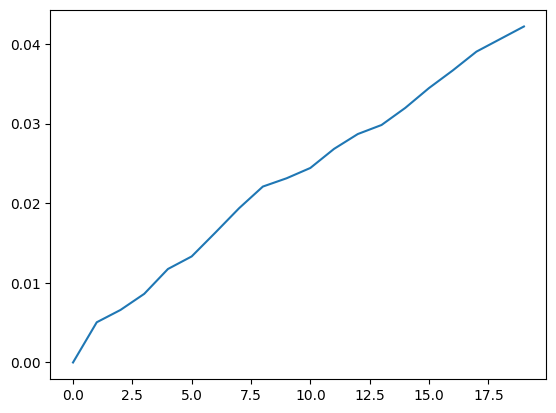

In [ ]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [ ]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [ ]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [ ]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  5.05050505e-03,  6.59722222e-03,  8.61742424e-03,
        1.17424242e-02,  1.33207071e-02,  1.63194444e-02,  1.93813131e-02,
        2.20959596e-02,  2.31376263e-02,  2.44318182e-02,  2.68308081e-02,
        2.86931818e-02,  2.98295455e-02,  3.19760101e-02,  3.44696970e-02,
        3.66792929e-02,  3.90467172e-02,  4.06250000e-02,  4.22032828e-02])

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

88.3 0.95


In [ ]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [ ]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15955

# 6) LR Model without vs with stop_words

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

86.87 1.07


15673

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

86.77 1.03


1086

In [ ]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2))

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_)

85.24 1.3


300

# 7) TF-IDF Vector + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.14
85.24 0.84


1000

# 8) Dimesionality Reduction

In [ ]:
# [7920 x 15955] >>> [7920 x 1000]

In [ ]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_w/o_SW']
y = data['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)

87.42 0.25
86.57 0.83


15955

In [ ]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

# 9) N-Gram Models

In [ ]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.2
86.84 0.68


3322

In [ ]:
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             'anyhow', 'wherein', 'several', 'thin', 'seem',
                             'thru', 'amongst', 'whether', 'whose', 'whoever',
                             'own', 'besides', 'won', 'sometime', 'thence',
                             'ourselves', 'could', 'interest', 'any', "couldn't",
                             'twelve', 'first', 'too', 'with', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [ ]:
import joblib
joblib.__version__

'1.3.2'

In [ ]:
!pip install --upgrade joblib==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [ ]:
!pip install mglearn
import mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


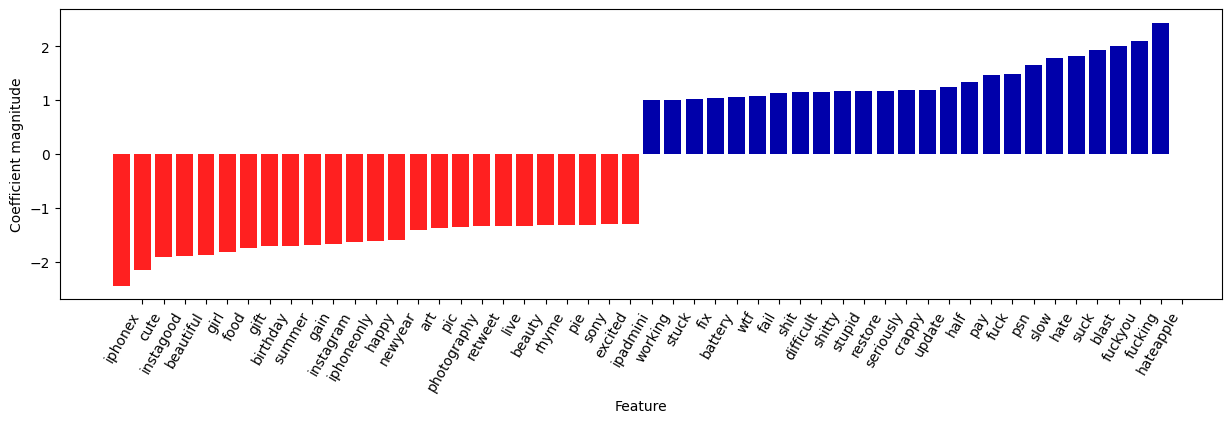

In [ ]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names_out())
# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

In [ ]:
len(coef.ravel()), len(feature_names)

(3322, 3322)

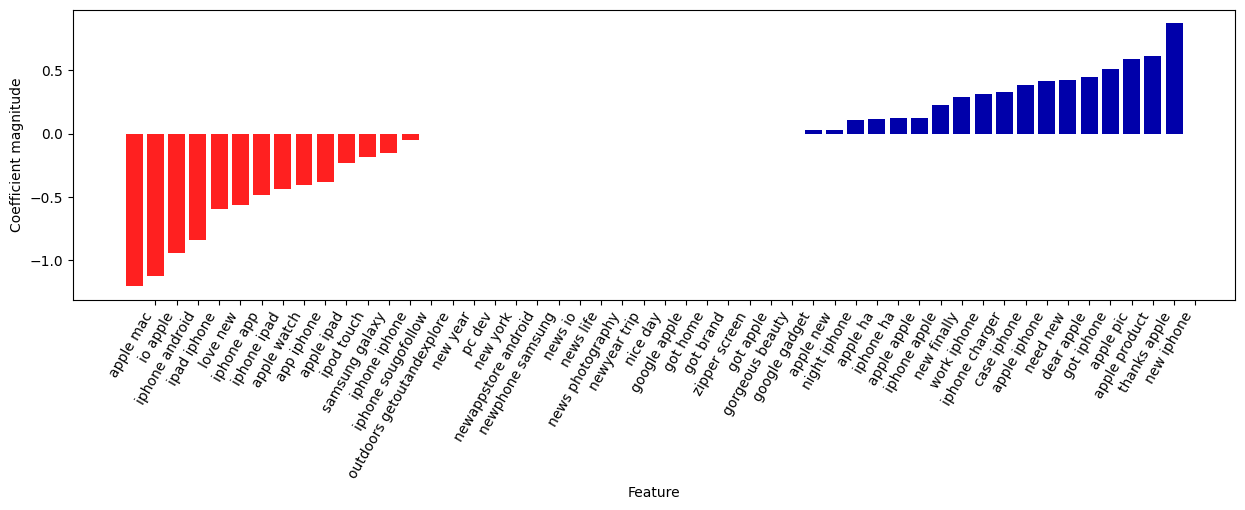

In [ ]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [ ]:
CV.vocabulary_

In [ ]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.88 0.2
86.84 0.68


3871

In [ ]:
len(coef.ravel()), len(feature_names)

(3871, 3871)

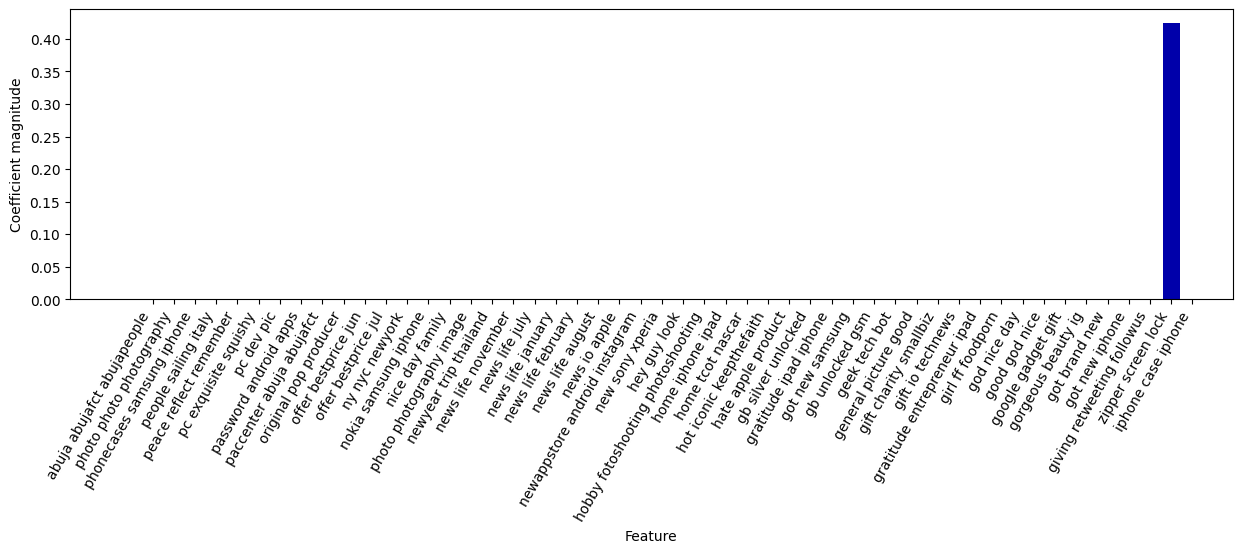

In [ ]:
# Visualizing only the trigrams
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
feature_names = np.array(CV.get_feature_names_out())

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [ ]:
data.to_pickle("tweets_cleaned.pkl")

# Load The Tweets Dataset

In [ ]:
import numpy as np
data = pd.read_pickle("tweets_cleaned.pkl")
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


# 10) Word Embeddings

In [ ]:
tweets_list = list(data['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0]

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [ ]:
# Each document vector will have dimension [1 x 300]

In [ ]:
!pip install gensim

In [ ]:
# Creating your own Word2Vec Model & Train
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [ ]:
# summarize the loaded model
print(cbow_model)

Word2Vec<vocab=2420, vector_size=300, alpha=0.025>


In [ ]:
cbow_model.wv.index_to_key[:20]  # this your vocab

['iphone',
 'apple',
 'i',
 'my',
 'the',
 'to',
 'a',
 'is',
 'samsung',
 'it',
 'and',
 'you',
 'new',
 'twitter',
 'for',
 'com',
 'phone',
 'me',
 'sony',
 'not']

In [ ]:
len(cbow_model.wv.index_to_key)

2420

In [ ]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""

    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]

    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

# np.mean(model[doc], axis=0)

In [ ]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector)

In [ ]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [0.10668807, 0.2821848, -0.050149485, 0.09198554, 0.05548553, -0.44406417, 0.1209624, 0.62117666, -0.12515572, 0.016211873, -0.035006836, -0.17322871, -0.062137507, -0.075634405, -0.13851038, -0.1...
1    [0.004012974, 0.17486188, -0.027005712, 0.021753265, -0.0023566387, -0.2836085, 0.21875712, 0.48533574, -0.018143302, -0.33426413, -0.0029839762, -0.3243371, -0.019512901, 0.097177975, -0.21360168...
2    [-0.007117585, 0.13172339, 0.059305053, 0.10085797, -0.023129148, -0.14426391, 0.21056694, 0.4684906, 0.09043652, -0.20472658, 0.05290505, -0.22669172, -0.028750949, 0.039518144, -0.16770077, -0.0...
3    [0.012241395, 0.116098866, 0.091206685, 0.13663942, -0.04407158, -0.1150091, 0.2620955, 0.5142645, 0.13754636, -0.27927014, 0.08661993, -0.28830498, -0.017397057, 0.08315122, -0.20260122, -0.07997...
4    [-0.01875447, 0.10797949, 0.06547093, 0.117558725, -0.045654282, -0.10610642, 0.2540047, 0.48338997, 0.14461415, -0.30044225, 0.07743451, -0.2809366, -0.036581405, 0.06615663,

In [ ]:
tweets_temp[0].shape  # each document vecotr is 300-dimensional !!

(300,)

In [ ]:
type(tweets_temp)

pandas.core.series.Series

In [ ]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 300)

In [ ]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,0.106688,0.282185,-0.050149,0.091986,0.055486,-0.444064,0.120962,0.621177,-0.125156,0.016212,...,0.283435,0.012956,0.011933,0.278779,0.295498,0.078697,-0.177834,0.187144,-0.082041,0
1,0.004013,0.174862,-0.027006,0.021753,-0.002357,-0.283608,0.218757,0.485336,-0.018143,-0.334264,...,0.294855,0.142079,0.006772,0.346260,0.271462,-0.013047,-0.205726,0.149292,-0.159746,0
2,-0.007118,0.131723,0.059305,0.100858,-0.023129,-0.144264,0.210567,0.468491,0.090437,-0.204727,...,0.275770,0.136790,0.079698,0.309079,0.240285,0.032052,-0.079508,0.078527,-0.110787,0
3,0.012241,0.116099,0.091207,0.136639,-0.044072,-0.115009,0.262096,0.514265,0.137546,-0.279270,...,0.329507,0.187271,0.116428,0.405087,0.254045,0.044600,-0.067564,0.072111,-0.120792,0
4,-0.018754,0.107979,0.065471,0.117559,-0.045654,-0.106106,0.254005,0.483390,0.144614,-0.300442,...,0.308387,0.187978,0.095288,0.368949,0.263268,0.030569,-0.087823,0.052599,-0.135910,1


In [ ]:
df.shape

(7920, 301)

In [ ]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(7920, 300)

In [ ]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

85.63 0.18
85.33 0.71


In [ ]:
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!!
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2))

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2))

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.95 0.08
87.75 1.01


300

# Load The Tweets Dataset

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

pd.set_option("display.max_colwidth", 200)

In [ ]:
data = pd.read_pickle("tweets_cleaned.pkl")
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [ ]:
# 0 refers to positive sentiment, 1 is negative sentiment

# 11) Simple Deep Learning Model with OHE (Binary) Features

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import pydot
import keras.backend as K

In [ ]:
# This user-defined function return a Deep Learning Model

def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(64, input_shape=(n_words,), activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
#     model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], )

    # summarize defined model
    model.summary()
    plot_model(model, to_file='model1.png', show_shapes=True)
    return model

In [ ]:
# evaluate a neural network model
def evaluate_model(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 5
    n_words = Xtest.shape[1]

    for i in range(n_repeats):
        # define network
        model = define_model(n_words)

        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)

        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)

        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [ ]:
# fit a tokenizer
from keras.preprocessing.text import Tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer() # num_words=1000
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [ ]:
# create the tokenizer
train_docs = data['cleaned_tweets_with_SW']
tokenizer = create_tokenizer(train_docs)

In [ ]:
# encode data
X = tokenizer.texts_to_matrix(train_docs, mode='binary')

In [ ]:
X.shape

(7920, 15351)

In [ ]:
X[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
y = data['label']

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size=0.2,random_state=42)

In [ ]:
Xtrain.shape, Xtest.shape

((6336, 15351), (1584, 15351))

In [ ]:
# define network
K.clear_session()
n_words = Xtrain.shape[1]
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                982528    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 984,641
Trainable params: 984,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit network
checkpoint = ModelCheckpoint("BestModel.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
callbacks = [checkpoint]

h = model.fit(Xtrain, ytrain, validation_split=0.1, callbacks = callbacks, batch_size=180, epochs=25, verbose=2)

Epoch 1/25

Epoch 1: val_loss improved from inf to 0.82780, saving model to BestModel.h5
32/32 - 6s - loss: 1.2089 - accuracy: 0.7476 - val_loss: 0.8278 - val_accuracy: 0.7871 - 6s/epoch - 197ms/step
Epoch 2/25

Epoch 2: val_loss improved from 0.82780 to 0.62010, saving model to BestModel.h5
32/32 - 0s - loss: 0.7117 - accuracy: 0.8167 - val_loss: 0.6201 - val_accuracy: 0.8533 - 325ms/epoch - 10ms/step
Epoch 3/25

Epoch 3: val_loss improved from 0.62010 to 0.53405, saving model to BestModel.h5
32/32 - 0s - loss: 0.5773 - accuracy: 0.8716 - val_loss: 0.5340 - val_accuracy: 0.8707 - 354ms/epoch - 11ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.53405 to 0.48510, saving model to BestModel.h5
32/32 - 0s - loss: 0.5082 - accuracy: 0.8827 - val_loss: 0.4851 - val_accuracy: 0.8691 - 316ms/epoch - 10ms/step
Epoch 5/25

Epoch 5: val_loss improved from 0.48510 to 0.44984, saving model to BestModel.h5
32/32 - 0s - loss: 0.4628 - accuracy: 0.8864 - val_loss: 0.4498 - val_accuracy: 0.8754 - 

Text(0, 0.5, 'Loss Fn valaues')

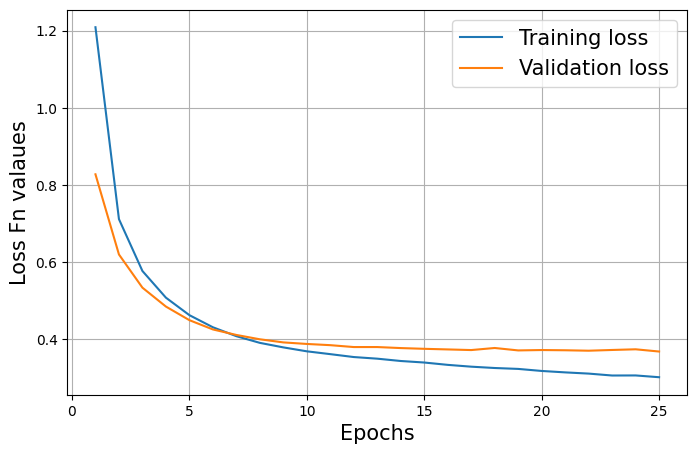

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['loss'], label='Training loss')
plt.plot(list(range(1,26)), h.history['val_loss'], label='Validation loss')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss Fn valaues', fontsize=15)

Text(0, 0.5, 'Accuracy')

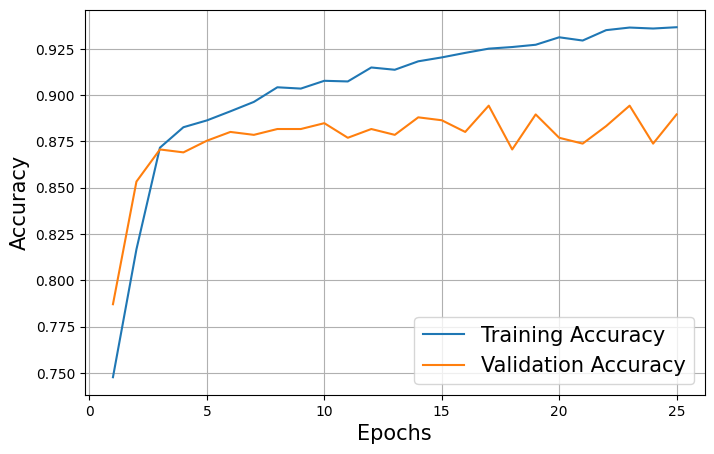

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(list(range(1,26)), h.history['accuracy'], label='Training Accuracy')
plt.plot(list(range(1,26)), h.history['val_accuracy'], label='Validation Accuracy')
plt.legend(fontsize=15)
plt.grid()
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In [ ]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 89.204544


In [ ]:
# evaluate (Train & Test repeated 5 times)
res = evaluate_model(Xtrain, ytrain, Xtest, ytest)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                982528    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 984,641
Trainable params: 984,641
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.8800504803657532
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                982528    
                                                             

# 12) Word Embedding Model using Keras Embedding Layer

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [ ]:
data.head()

,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data['cleaned_tweets_w/o_SW'], data['label'],  test_size=0.2, random_state=42)

In [ ]:
Xtrain.shape

(6336,)

In [ ]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)

    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [ ]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Vocabulary size: 15351
Maximum length: 37


In [ ]:
tokenizer = create_tokenizer(Xtrain)
padded_docs_train = encode_docs(tokenizer, max_length, Xtrain)
padded_docs_train

array([[  134,   381,  4946, ...,  4958,  4959,     0],
       [   44,   348,    76, ...,     0,     0,     0],
       [  954,    54,     5, ...,     0,     0,     0],
       ...,
       [   10,   110,    10, ...,     0,     0,     0],
       [   44, 13830,     1, ...,     0,     0,     0],
       [   38,    62,    46, ...,     0,     0,     0]], dtype=int32)

In [ ]:
padded_docs_train.shape

(6336, 37)

In [ ]:
tokenizer = create_tokenizer(Xtest)
padded_docs_test = encode_docs(tokenizer, max_length, Xtest)
padded_docs_test.shape

(1584, 37)

In [ ]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 300, input_length=max_length))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features

    model.add(Conv1D(filters=64, kernel_size=8, activation='relu')) # this layer does feature extraction from the text
    model.add(MaxPooling1D(pool_size=2)) # this layer concentrates to more imp. features

    model.add(Flatten()) # feature matrix is collapsed into one dimension.
    model.add(Dense(64, activation='relu'))  # hidden layer
    model.add(Dense(32, activation='relu'))  # hidden layer

    model.add(Dense(1, activation='sigmoid')) # output layer

    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # summarize defined model
#     model.summary()
    plot_model(model, to_file='model2.png', show_shapes=True)

    return model

In [ ]:
# define model
K.clear_session()
model = define_model(vocab_size, max_length)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 300)           4605300   
                                                                 
 conv1d (Conv1D)             (None, 35, 64)            57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 17, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            32832     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 5, 64)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 320)               0

In [ ]:
# fit network
model.fit(padded_docs_train, ytrain, epochs=25, verbose=2, validation_data=(padded_docs_test, ytest))

# save the model
model.save('model_DL_WE.h5')

Epoch 1/25
198/198 - 28s - loss: 0.3338 - accuracy: 0.8486 - val_loss: 1.3060 - val_accuracy: 0.7197 - 28s/epoch - 143ms/step
Epoch 2/25
198/198 - 4s - loss: 0.1695 - accuracy: 0.9351 - val_loss: 1.4045 - val_accuracy: 0.7071 - 4s/epoch - 22ms/step
Epoch 3/25
198/198 - 3s - loss: 0.0894 - accuracy: 0.9694 - val_loss: 1.7932 - val_accuracy: 0.6862 - 3s/epoch - 17ms/step
Epoch 4/25
198/198 - 2s - loss: 0.0424 - accuracy: 0.9874 - val_loss: 2.4742 - val_accuracy: 0.7033 - 2s/epoch - 12ms/step
Epoch 5/25
198/198 - 2s - loss: 0.0205 - accuracy: 0.9940 - val_loss: 2.7093 - val_accuracy: 0.6894 - 2s/epoch - 10ms/step
Epoch 6/25
198/198 - 2s - loss: 0.0066 - accuracy: 0.9975 - val_loss: 3.3705 - val_accuracy: 0.6787 - 2s/epoch - 10ms/step
Epoch 7/25
198/198 - 1s - loss: 0.0081 - accuracy: 0.9979 - val_loss: 2.8613 - val_accuracy: 0.6869 - 1s/epoch - 6ms/step
Epoch 8/25
198/198 - 2s - loss: 0.0155 - accuracy: 0.9951 - val_loss: 2.4855 - val_accuracy: 0.6420 - 2s/epoch - 9ms/step
Epoch 9/25
198/

In [ ]:
# evaluate the model ONCe on the test set
loss, acc = model.evaluate(padded_docs_test, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Test Accuracy: 66.666669
